# **Naive Bayes Classification**

#### **Student Name:** Daniel Giedraitis 

#### **Student Number:** C00260331

#### **Module:** Data Science and Machine Learning 2 - Y4



<br>

## **Bayesian Classification**

Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

<br>

## **Business Understanding**

**Objective:**

The objective of this python notebook is to expand my data science and machine learning portfolio by implementing and understanding the naive Bayes classification algorithm using a new data set [drug200.csv](https://www.kaggle.com/datasets/sukhenwaghmare/drug-classification-naive-bayes?select=drug200.csv) and making changes to this [notebook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/05.05-Naive-Bayes.ipynb). The notebook aims to gain theoretical and practical insights into the workings of the naive Bayes algorithm and its application in real world scenarios.

**Data Set:**

The data set [drug200.csv](https://www.kaggle.com/datasets/sukhenwaghmare/drug-classification-naive-bayes?select=drug200.csv) contains information about patients including their age, sex, blood pressure (BP), cholesterol level, and the ratio of Sodium to Potassium (Na_to_K), along with the drug prescribed to them. This information will be used to train a naive Bayes classifier to predict the appropriate drug for future patients based on their characteristics.

<br>

## **Data Understanding**

#### **Data Source:**

The data set [drug200.csv](https://www.kaggle.com/datasets/sukhenwaghmare/drug-classification-naive-bayes?select=drug200.csv) has been used for this notebook. It consists of 200 samples and 6 features including age, Sex, BP, cholesterol, Na_to_K, and drug.

#### **Data Exploration:**

Before proceeding with modeling, I will explore the data to understand its structure, distribution, and relationships between features. This exploration will help in identifying any data preprocessing steps required and gaining insights into the characteristics of the data set.

#### **Change Log:** 
- Added [drug200.csv](https://www.kaggle.com/datasets/sukhenwaghmare/drug-classification-naive-bayes?select=drug200.csv) data set.

#### **Preprocessing:**

In [1]:
import pandas as pd

# Load data
data = pd.read_csv("datasets/drug200.csv")


<br>

## **Data Preparation**

#### **Preprocessing:**
1. Check for missing values and handle them appropriately.
2. Encode categorical variables (such as sex, BP, cholesterol) using one-hot encoding or label encoding.
3. Split the data set into training and testing sets to evaluate the performance of the classifiers.

#### **Change Log:**
- Checked for missing values and handled them by imputation.
- Encoded categorical variables (sex, BP, cholesterol) using one-hot encoding.

#### **Preprocessing - Missing Values:**

In [2]:
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy="most_frequent") # Create an instance of SimpleImputer with "most_frequent" strategy
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns) # Impute missing values using the most frequent strategy and create a new DataFrame


#### **Preprocessing - Encoding:**

In [3]:
from sklearn.preprocessing import OneHotEncoder

# Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_features = encoder.fit_transform(data_imputed[["Sex", "BP", "Cholesterol"]])
data_encoded = pd.concat([data_imputed.drop(["Sex", "BP", "Cholesterol"], axis=1),
                          pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(["Sex", "BP", "Cholesterol"]))], axis=1)



#### **Train-Test Split:**

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X = data_encoded.drop("Drug", axis=1)
y = data_encoded["Drug"]

# Split X and y into training and testing sets, with 80% of the data used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<br>

## **Modeling**

Implementing Gaussian Naive Bayes and Multinomial Naive Bayes classifiers involves initialising the models, training them on the training dataset, and making predictions on the test dataset. Choosing the appropriate model architecture and hyperparameters is crucial for achieving optimal performance. Evaluating multiple models allows for comparison and selection of the best performing classifier for the given task.

### **Gaussian Naive Bayes Classifier:**
Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes. In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution.

#### **Change Log:**
- Implemented Gaussian Naive Bayes classifier using Scikit-Learn's GaussianNB estimator.
- Trained the model on the training data set.

In [5]:
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naive Bayes classifier
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train, y_train)


GaussianNB()

### **Multinomial Naive Bayes Classifier:**
The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label. Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution. The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.
#### **Change Log:**
- Implemented Multinomial Naive Bayes classifier using Scikit-Learn's MultinomialNB estimator.
- Trained the model on the training data set.

In [6]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Multinomial Naive Bayes classifier
mnb_model = MultinomialNB()

# Train the model
mnb_model.fit(X_train, y_train)


MultinomialNB()

<br>

## **Evaluation**

Evaluation metrics such as accuracy, precision, recall, and F1-score provide quantitative measures of the classifiers' performance. Analysing confusion matrices helps identify any misclassifications or areas where the model may need improvement. Understanding the strengths and weaknesses of each classifier aids in interpreting the results and guiding future model development efforts.

### **Performance Metrics:**

#### **Change Log:**
- Evaluated the performance of both Gaussian Naive Bayes and Multinomial Naive Bayes classifiers using accuracy, precision, recall, and F1-score.
- Visualised the confusion matrices to analyze classification performance.

#### **Performance Metrics Calculation:**

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
gnb_y_pred = gnb_model.predict(X_test)
mnb_y_pred = mnb_model.predict(X_test)

# Performance Metrics Calculation
gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
mnb_accuracy = accuracy_score(y_test, mnb_y_pred)

gnb_precision = precision_score(y_test, gnb_y_pred, average="weighted")
mnb_precision = precision_score(y_test, mnb_y_pred, average="weighted")

gnb_recall = recall_score(y_test, gnb_y_pred, average="weighted")
mnb_recall = recall_score(y_test, mnb_y_pred, average="weighted")

gnb_f1 = f1_score(y_test, gnb_y_pred, average="weighted")
mnb_f1 = f1_score(y_test, mnb_y_pred, average="weighted")




#### **Confusion Matrices:**

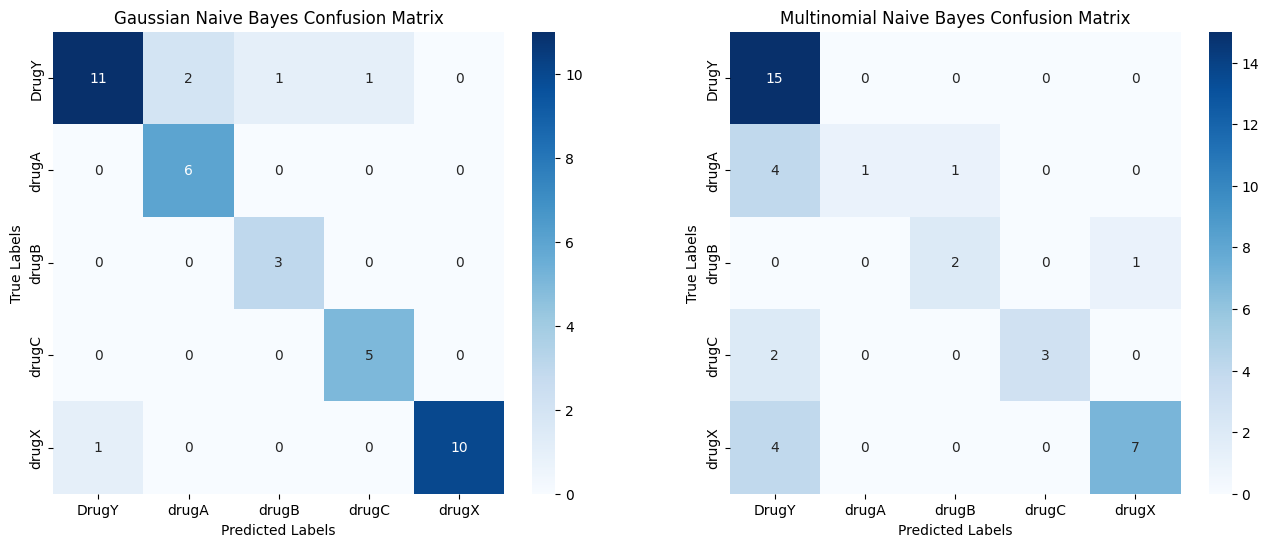

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrices
gnb_conf_mat = confusion_matrix(y_test, gnb_y_pred)
mnb_conf_mat = confusion_matrix(y_test, mnb_y_pred)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(gnb_conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=gnb_model.classes_, yticklabels=gnb_model.classes_, ax=axes[0])
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')
axes[0].set_title('Gaussian Naive Bayes Confusion Matrix')

sns.heatmap(mnb_conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=mnb_model.classes_, yticklabels=mnb_model.classes_, ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Multinomial Naive Bayes Confusion Matrix')

plt.show()



#### **Score Table:**

In [9]:
import pandas as pd

# Score Table
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Gaussian Naive Bayes': [gnb_accuracy, gnb_precision, gnb_recall, gnb_f1],
    'Multinomial Naive Bayes': [mnb_accuracy, mnb_precision, mnb_recall, mnb_f1]
}

metrics_df = pd.DataFrame(metrics_data)
print("Score Table:")
print(metrics_df)

Score Table:
      Metric  Gaussian Naive Bayes  Multinomial Naive Bayes
0   Accuracy              0.875000                 0.700000
1  Precision              0.891667                 0.790625
2     Recall              0.875000                 0.700000
3   F1-score              0.873954                 0.670489


<br>

## **Deployment**

#### **Serialized Models:**
I will serialize the trained naive Bayes classifier into a serialized format for deployment. This serialized model can then be integrated into a web application or any other deployment platform for real time predictions.

#### **Change Log:**
- Serialised both the trained Gaussian Naive Bayes and Multinomial Naive Bayes classifiers into pickle files.

In [10]:
import pickle

# Serialize Gaussian Naive Bayes model
with open('models/gnb_model.pkl', 'wb') as file:
    pickle.dump(gnb_model, file)

# Serialize Multinomial Naive Bayes model
with open('models/mnb_model.pkl', 'wb') as file:
    pickle.dump(mnb_model, file)


<br>

## **Conclusion**

In this project, I expanded my data science and machine learning portfolio by implementing and exploring Gaussian Naive Bayes and Multinomial Naive Bayes classification algorithms using the drug200.csv dataset.

#### **Key Findings:**
1. **Exploratory Data Analysis:** I explored the drug200.csv dataset to understand its structure, distribution, and relationships between features. This exploration helped in identifying preprocessing steps required and gaining insights into the characteristics of the dataset.

2. **Data Preparation:** Preprocessing steps such as handling missing values and encoding categorical variables were performed to prepare the dataset for modeling. The dataset was split into training and testing sets to evaluate the performance of the classifiers.

3. **Modeling:** Gaussian Naive Bayes and Multinomial Naive Bayes classifiers were implemented using Scikit-Learn. Both models were trained on the training dataset to predict the appropriate drug for patients based on their characteristics.

4. **Evaluation:** The performance of both classifiers was evaluated using accuracy, precision, recall, and F1-score metrics. Additionally, confusion matrices were visualized to analyze the classification performance.

#### **Key Outcomes:**
- **Gaussian Naive Bayes Performance:** The Gaussian Naive Bayes classifier achieved an accuracy of 87.5%, with precision, recall, and F1-score values of approximately 89.17%, 87.5%, and 87.40%.

- **Multinomial Naive Bayes Performance:** The Multinomial Naive Bayes classifier exhibited an accuracy of 70.0%, with precision, recall, and F1-score values of around 79.06%, 70.0%, and 67.05%.

#### **Conclusion:**
In conclusion, both Gaussian Naive Bayes and Multinomial Naive Bayes classifiers showed promising performance in predicting the appropriate drug based on patient characteristics. The Gaussian Naive Bayes classifier outperformed the Multinomial Naive Bayes classifier in terms of accuracy, precision, recall, and F1-score. However, it's essential to consider the specific requirements and characteristics of the application domain when choosing between these classifiers.

Overall, this notebook provided valuable insights into the application of Naive Bayes classifiers in pharmaceutical research and healthcare analytics, contributing to the enhancement of the data science and machine learning portfolio.

<br>